In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [5]:
df = pd.read_csv(r"C:\Users\hp\Downloads\new_york_listings_2024.csv")
print(df.head())

                   id                                               name  \
0             1312228         Rental unit in Brooklyn · ★5.0 · 1 bedroom   
1            45277537  Rental unit in New York · ★4.67 · 2 bedrooms ·...   
2  971353993633883038  Rental unit in New York · ★4.17 · 1 bedroom · ...   
3             3857863  Rental unit in New York · ★4.64 · 1 bedroom · ...   
4            40896611  Condo in New York · ★4.91 · Studio · 1 bed · 1...   

     host_id           host_name neighbourhood_group       neighbourhood  \
0    7130382              Walter            Brooklyn        Clinton Hill   
1   51501835            Jeniffer           Manhattan      Hell's Kitchen   
2  528871354              Joshua           Manhattan             Chelsea   
3   19902271  John And Catherine           Manhattan  Washington Heights   
4   61391963      Stay With Vibe           Manhattan         Murray Hill   

    latitude  longitude        room_type  price  ...  last_review  \
0  40.683710 -73.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [10]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

In [37]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [12]:
df.duplicated().sum()

0

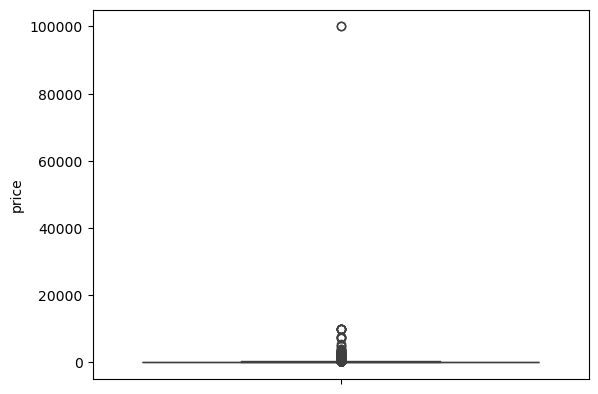

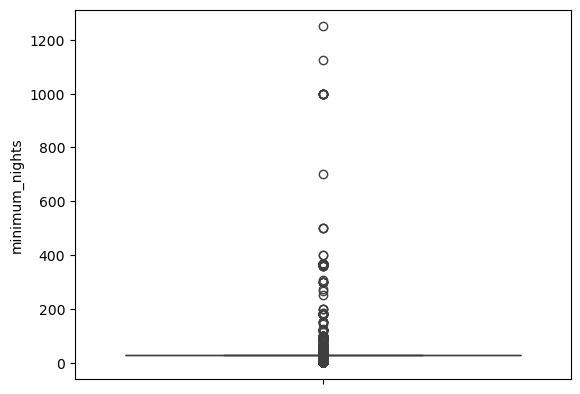

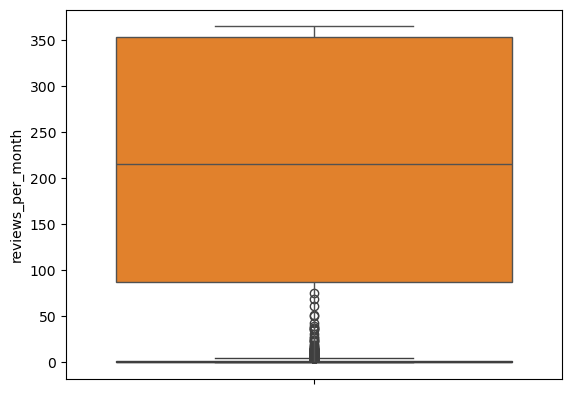

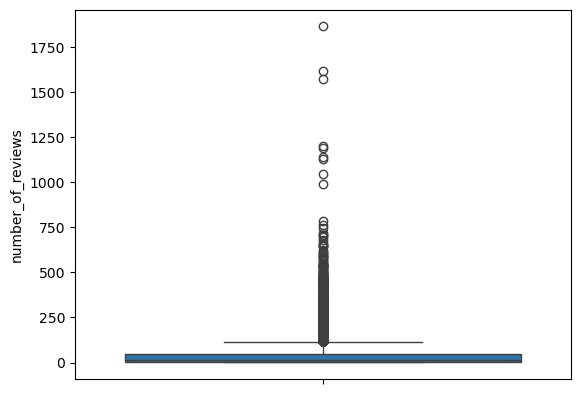

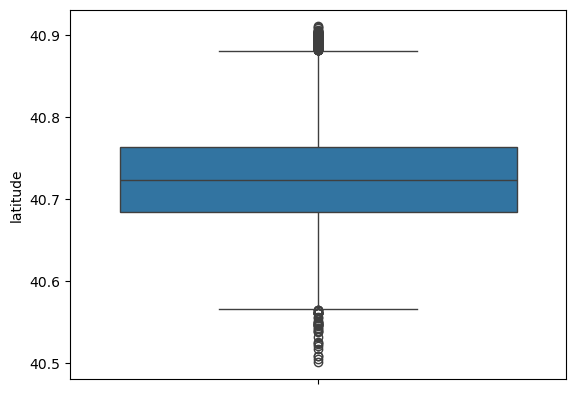

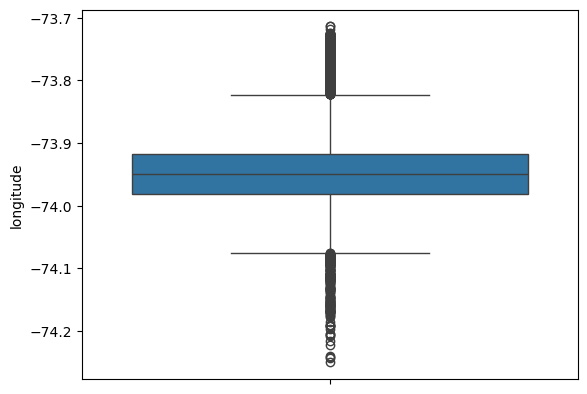

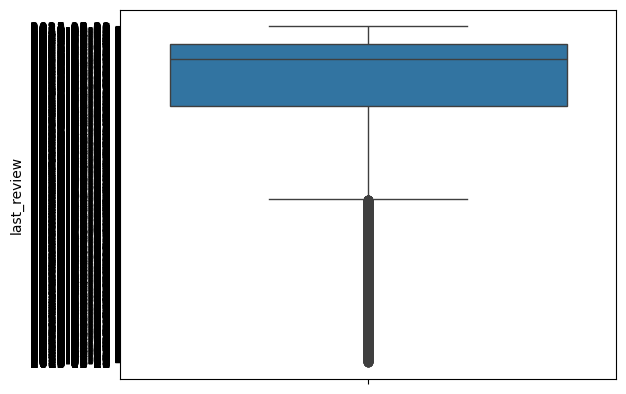

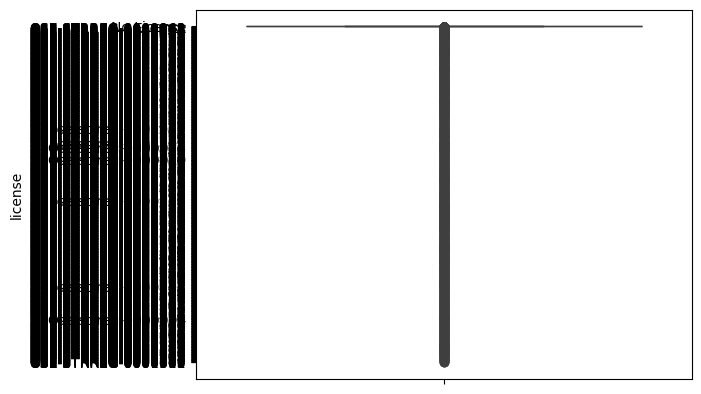

In [14]:
sns.boxplot(df['price'])
plt.show()

sns.boxplot(df['minimum_nights'])
plt.show()

sns.boxplot(df['reviews_per_month'])
plt.show

sns.boxplot(df['availability_365'])
plt.show()

sns.boxplot(df['number_of_reviews'])
plt.show()

sns.boxplot(df['latitude'])
plt.show()

sns.boxplot(df['longitude'])
plt.show()

sns.boxplot(df['last_review'])
plt.show()

sns.boxplot(df['license'])
plt.show()

In [34]:
def clean_unrealistic(df):
    df = df.copy()

    # Price must be > 0 and < 2000
    df = df[(df['price'] > 0) & (df['price'] < 2000)]


    # Minimum nights: keep between 1 and 30
    df = df[(df['minimum_nights'] >= 1) & (df['minimum_nights'] <= 30)]

    # Availability must be 0–365
    df = df[(df['availability_365'] >= 0) & (df['availability_365'] <= 365)]

    # Reviews per month: must be realistic (0–30)
    df = df[(df['reviews_per_month'] >= 0) & (df['reviews_per_month'] <= 30)]

    return df


In [36]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


In [38]:
def handle_missing(df):
    df = df.copy()

    # Fill missing reviews_per_month with 0 (if no reviews)
    if 'reviews_per_month' in df.columns:
        df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

    # Fill categorical missing values with mode
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = df[col].fillna(df[col].mode()[0])

    # Fill numeric missing values with median
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in num_cols:
        df[col] = df[col].fillna(df[col].median())

    return df


In [40]:
def encode(df):
    df = df.copy()
    label = LabelEncoder()

    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        df[col] = label.fit_transform(df[col])

    return df


In [42]:
def remove_outliers(df):
    df = df.copy()
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]

    return df


In [26]:
def clean(df):
    df = clean_unrealistic(df)
    df = handle_missing(df)
    df = remove_outliers(df)
    df = encode(df)
    return df


In [44]:
df_clean = clean(df)
df_clean.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,2386,7130382,3264,1,29,40.683710,-73.96461,2,55.0,...,54,0.03,1,0,0,1,141,0,1,10
8,19280212,2142,2526182,2048,1,149,40.711530,-73.95312,2,90.0,...,1410,0.24,2,5,2,1,120,0,1,1
9,895681617796889995,1996,14251313,1739,1,132,40.658913,-73.98959,0,292.0,...,1428,1.71,1,365,12,1,108,0,1,1
10,17367484,3248,84109314,2110,3,2,40.760680,-73.90926,2,120.0,...,1369,0.22,1,365,1,1,143,0,2,1
11,22066430,2065,20604809,1269,1,149,40.713200,-73.96176,0,160.0,...,1417,0.67,1,0,7,1,112,8,1,1


In [70]:
import pandas as pd

# 1. Days since last review
df_clean['last_review'] = pd.to_datetime(df_clean['last_review'], errors='coerce')

df_clean['days_since_last_review'] = (
    pd.Timestamp.today() - df_clean['last_review']
).dt.days

df_clean['days_since_last_review'] = df_clean['days_since_last_review'].fillna(
    df_clean['days_since_last_review'].max()
)

# 2. Multi-host flag
df_clean['is_multi_host'] = df_clean['calculated_host_listings_count'] > 1


In [72]:
import numpy as np

df_clean['log_price'] = np.log1p(df_clean['price'])


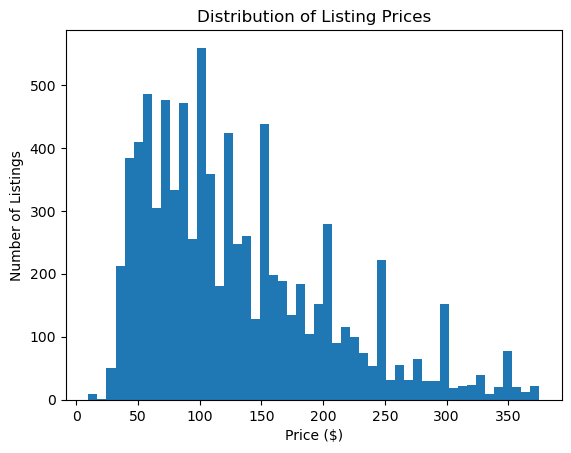

In [74]:
plt.figure()
plt.hist(df_clean['price'], bins=50)
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.title("Distribution of Listing Prices")
plt.show()

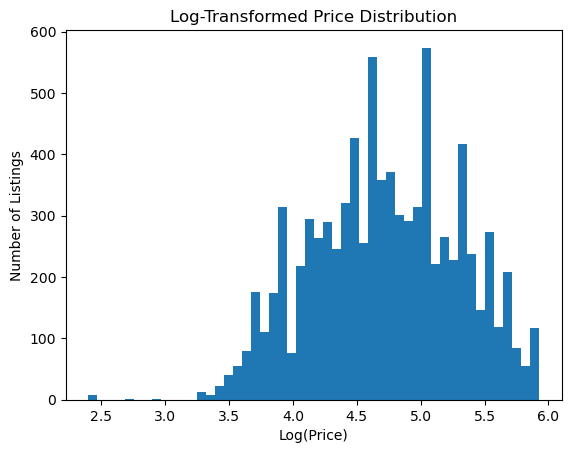

In [76]:
plt.figure()
plt.hist(df_clean['log_price'], bins=50)
plt.xlabel("Log(Price)")
plt.ylabel("Number of Listings")
plt.title("Log-Transformed Price Distribution")
plt.show()


<Figure size 640x480 with 0 Axes>

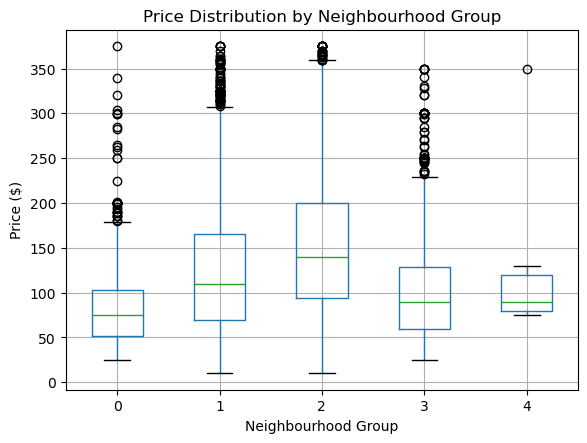

In [78]:
plt.figure()
df_clean.boxplot(column='price', by='neighbourhood_group')
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price ($)")
plt.title("Price Distribution by Neighbourhood Group")
plt.suptitle("")
plt.show()


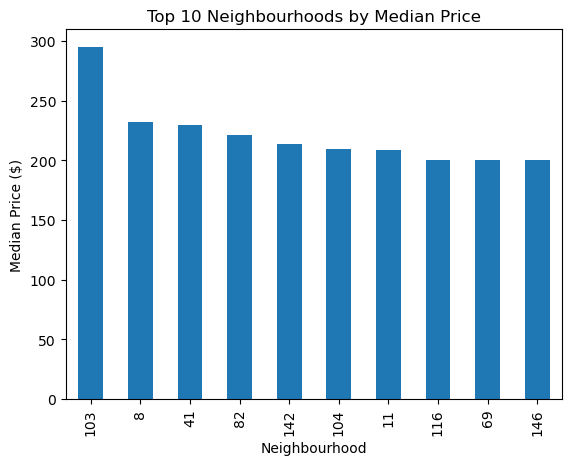

In [80]:
top_neighb = (
    df_clean.groupby('neighbourhood')['price']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_neighb.plot(kind='bar')
plt.xlabel("Neighbourhood")
plt.ylabel("Median Price ($)")
plt.title("Top 10 Neighbourhoods by Median Price")
plt.show()


<Figure size 640x480 with 0 Axes>

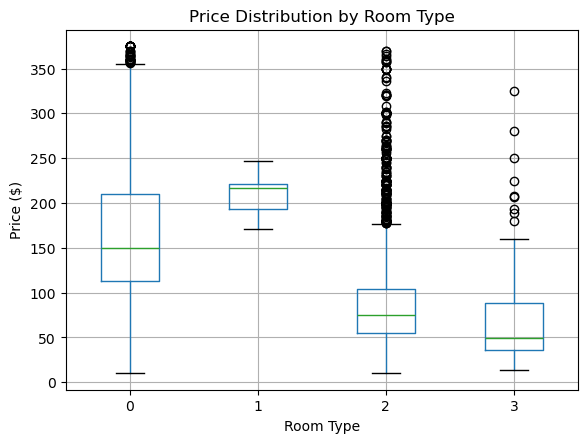

In [58]:
plt.figure()
df_clean.boxplot(column='price', by='room_type')
plt.xlabel("Room Type")
plt.ylabel("Price ($)")
plt.title("Price Distribution by Room Type")
plt.suptitle("")
plt.show()


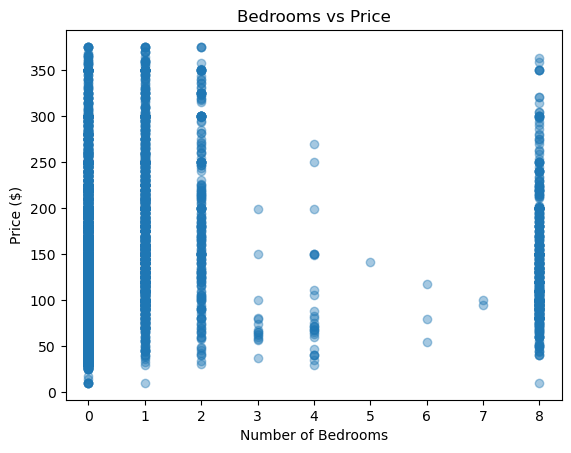

In [82]:
plt.figure()
plt.scatter(df_clean['bedrooms'], df_clean['price'], alpha=0.4)
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price ($)")
plt.title("Bedrooms vs Price")
plt.show()


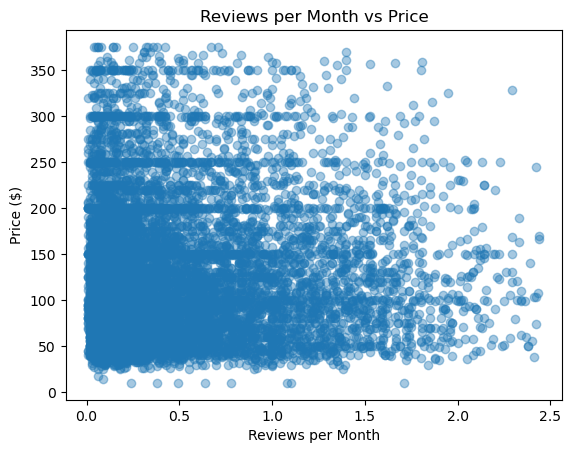

In [84]:
plt.figure()
plt.scatter(df_clean['reviews_per_month'], df_clean['price'], alpha=0.4)
plt.xlabel("Reviews per Month")
plt.ylabel("Price ($)")
plt.title("Reviews per Month vs Price")
plt.show()


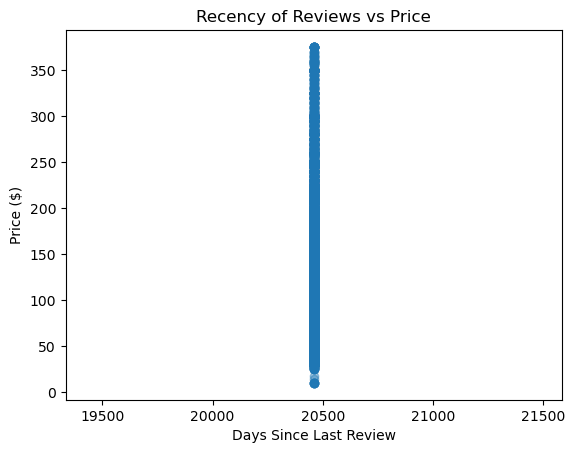

In [86]:
plt.figure()
plt.scatter(df_clean['days_since_last_review'], df_clean['price'], alpha=0.4)
plt.xlabel("Days Since Last Review")
plt.ylabel("Price ($)")
plt.title("Recency of Reviews vs Price")
plt.show()


<Figure size 640x480 with 0 Axes>

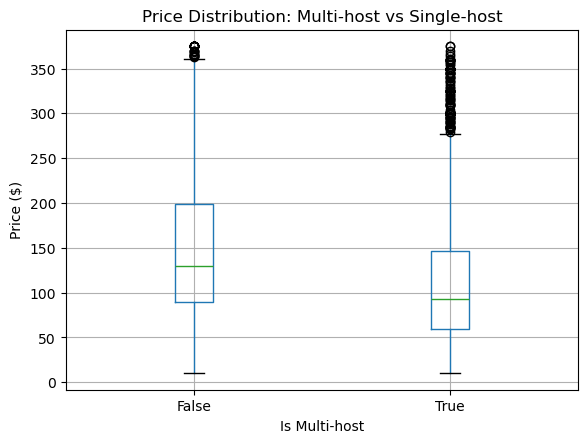

In [88]:
plt.figure()
df_clean.boxplot(column='price', by='is_multi_host')
plt.xlabel("Is Multi-host")
plt.ylabel("Price ($)")
plt.title("Price Distribution: Multi-host vs Single-host")
plt.suptitle("")
plt.show()


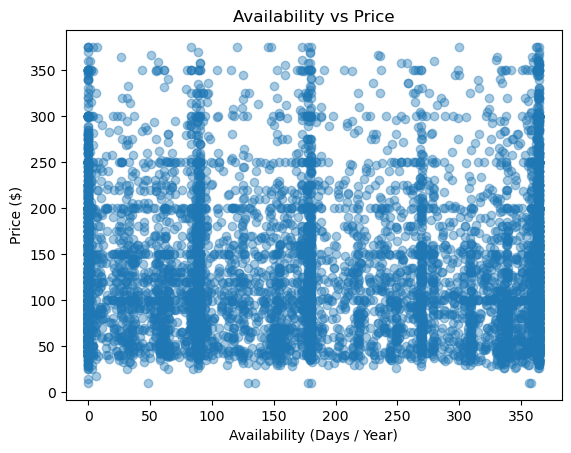

In [68]:
plt.figure()
plt.scatter(df_clean['availability_365'], df_clean['price'], alpha=0.4)
plt.xlabel("Availability (Days / Year)")
plt.ylabel("Price ($)")
plt.title("Availability vs Price")
plt.show()


In [90]:
y = df_clean['log_price']   # target


In [92]:
drop_cols = [
    'id',
    'host_id',
    'host_name',
    'name',
    'neighbourhood',
    'last_review',
    'price',          # raw price (we use log_price)
    'log_price'
]

X = df_clean.drop(columns=drop_cols)


In [94]:
categorical_cols = [
    'neighbourhood_group',
    'room_type',
    'license'
]

numerical_cols = [
    col for col in X.columns if col not in categorical_cols
]

print("Categorical:", categorical_cols)
print("Numerical:", numerical_cols)


Categorical: ['neighbourhood_group', 'room_type', 'license']
Numerical: ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'rating', 'bedrooms', 'beds', 'baths', 'days_since_last_review', 'is_multi_host']


In [96]:
X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42
)

print(X_train.shape, X_test.shape)


(6828, 35) (1707, 35)


In [100]:
X_train.isnull().sum().sum()


0

In [102]:
X_train.head()


,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,rating,bedrooms,...,license_5,license_6,license_7,license_8,license_9,license_10,license_11,license_12,license_13,license_14
20005,40.674340,-73.889300,30,4,0.86,1,89,4,66,2,...,False,False,False,False,False,False,False,False,False,False
13382,40.718807,-73.956177,30,12,0.07,1,202,3,131,0,...,False,False,False,False,False,False,False,False,False,False
14763,40.746770,-73.911840,30,10,0.65,4,364,0,141,0,...,False,False,False,False,False,False,False,False,False,False
1175,40.654030,-73.961100,30,7,0.08,8,336,0,141,0,...,False,False,False,False,False,False,False,False,False,False
5460,40.687410,-73.930280,30,1,0.06,1,92,0,143,1,...,False,False,False,False,False,False,False,False,False,False


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [106]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [108]:
y_pred = lr.predict(X_test)


In [110]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Baseline Linear Regression RMSE (log-price): {rmse:.4f}")
print(f"Baseline Linear Regression R²: {r2:.4f}")


Baseline Linear Regression RMSE (log-price): 0.4338
Baseline Linear Regression R²: 0.4449


In [112]:
coef_df = (
    pd.DataFrame({
        'feature': X_train.columns,
        'coefficient': lr.coef_
    })
    .sort_values(by='coefficient', ascending=False)
)

coef_df.head(10)


,feature,coefficient
32,license_12,0.541138
22,license_2,0.535800
18,room_type_1,0.457994
24,license_4,0.263330
15,neighbourhood_group_2,0.174011
10,beds,0.142968
16,neighbourhood_group_3,0.135624
25,license_5,0.073272
0,latitude,0.067766
14,neighbourhood_group_1,0.063754


In [114]:
coef_df.tail(10)


,feature,coefficient
13,is_multi_host,-0.067496
23,license_3,-0.150346
34,license_14,-0.169113
21,license_1,-0.385965
17,neighbourhood_group_4,-0.457704
19,room_type_2,-0.517152
28,license_8,-0.746520
30,license_10,-0.776310
20,room_type_3,-0.827121
1,longitude,-2.675349
